# Introduction

The goal of this project is to learn about the **k Nearest Neighbor** classifier.

# Data

We will be using the IRIS dataset obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris).

The file is a comma delimited textfile with the following columns:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class of the iris plant
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica


We will be implementing the **kNN** classifier on this dataset to predict the class of the plant

# Data preprocessing
## Importing necessary libraries

kNN doesn't require training and is simple enough to implemenet. Therefore we will not be using any library for the **actual algorithm**. However to simplify the process of loading the data,shuffling, plotting graphs,etc we use the following libraries

In [973]:
import math
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load the data

`Pandas` is used to conveniently load the file into a dataframe

In [974]:
file_columns = ['sepal_len','sepal_width','petal_len','petal_width','class']
data = pd.read_csv('data/iris.data',header=None, names=file_columns)
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Shuffle the data

To prevent bias in learning, we shuffle the data before dividing it into development and testing set.

In [975]:
data = data.sample(frac=1).reset_index(drop=True)
data['seq'] = data.index
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class,seq
0,6.0,2.9,4.5,1.5,Iris-versicolor,0
1,4.8,3.4,1.6,0.2,Iris-setosa,1
2,5.9,3.0,4.2,1.5,Iris-versicolor,2
3,5.9,3.2,4.8,1.8,Iris-versicolor,3
4,5.0,2.0,3.5,1.0,Iris-versicolor,4


## Divide into Development and Test set

Dataset is split into development and test set in the ratio `75:25` respectively.

In [976]:
dev_size = int(data.shape[0]*0.75)
test_size = int(data.shape[0]*0.25)

# Take first 75% of the data as dev set
dev = data[:dev_size]

# Take last 25% of the data as test set
test = data[test_size:]

# kNN implementation

There is no learning or training required in **kNN**. The steps involved in **kNN** are 

* Calculate `k` nearest neighbors for every test data point using a distance metric
* Elect the most dominant class among the nearest neighbors

In order to determine the best hyperparameters i.e. `distance metric` and `k value`, we need to first measure their performance on the development dataset. This gives us insight about which hyperparameter fit this dataset well

## K values 

We experiment with the following values of k - `[1,3,5,7]`

## Distance metrics

For this dataset, we use the following distance metrics 

### 1. Euclidian distance
Euclidean distance between any two vectors is calculated using the formula

\begin{align}
Euclidean(X_i, X_j) = \sqrt{\sum_{v=1}^n(X_{vi}-X_{vj})^2}
\end{align}

In [977]:
def get_euclidean(row1, row2):
    return math.sqrt(sum([(x1-x2)**2 for x1,x2 in zip(row1,row2)]))

### 2. Cosine Similarity 
Cosine similarity of two vectors is calculated using the following formula

\begin{align}
Cosine(A, B) = \frac{A\cdot B}{\sum_{i=1}^n(A_i^2) \times \sum_{i=1}^n(B_i^2)} 
\end{align}

In [978]:
def get_cosine_sim(row1, row2):
    return math.acos(
        sum([x1*x2 for x1,x2 in zip(row1,row2)])/(sum([i**2 for i in row1]) * sum([i**2 for i in row2]))
    )

### 3. Normalized Euclidean distance

Simplest way to compute normalized euclidean distance would be to normalize the data and compute eucliean distance on the normalized data

In [979]:
ndev = pd.DataFrame(columns=['sepal_len', 'sepal_width','petal_len','petal_width', 'class', 'seq'])

ndev['class'] = dev['class'].copy()
ndev['seq'] = dev['seq'].copy()

ndev['sepal_len'] = dev['sepal_len'].apply(
    lambda x: (x-dev['sepal_len'].min())/(dev['sepal_len'].max()-dev['sepal_len'].min()))

ndev['sepal_width'] = dev['sepal_width'].apply(
    lambda x: (x-dev['sepal_width'].min())/(dev['sepal_width'].max()-dev['sepal_width'].min()))

ndev['petal_len'] = dev['petal_len'].apply(
    lambda x: (x-dev['petal_len'].min())/(dev['petal_len'].max()-dev['petal_len'].min()))

ndev['petal_width'] = dev['petal_width'].apply(
    lambda x: (x-dev['petal_width'].min())/(dev['petal_width'].max()-dev['petal_width'].min())) 

### Calculate Distances

Distance between every point in the dataset and every other point is calculated bet using all the above mentioned metrics - Euclidean, Cosine similariy, Normalized Euclidean.

In [980]:
dev2 = dev.values
ndev2 = ndev.values
eud = []
cosine_sim = []
neud = []
l = len(dev2)
for i in range(l):
    eu_distance = []
    cos_sim = []
    neu_distance = []
    for j in range(l):
        if(i!=j):
            index = dev2[j][5]
            nindex = ndev2[j][5]
            ed = get_euclidean(dev2[i][:-2], dev2[j][:-2])
            cs = get_cosine_sim(dev2[i][:-2], dev2[j][:-2])
            neu = get_euclidean(ndev2[i][:-2], ndev2[j][:-2])
            
            eu_distance.append((ed, index))
            cos_sim.append((cs, index))
            neu_distance.append((neu, nindex))
            
    eu_distance.sort(key= lambda x: x[0])
    cos_sim.sort(key= lambda x: x[0])
    neu_distance.sort(key= lambda x: x[0])
    
    eu_distance = [i[1] for i in eu_distance]
    cos_sim = [i[1] for i in cos_sim]
    neu_distance = [i[1] for i in neu_distance]
    
    eud.append(eu_distance)
    cosine_sim.append(cos_sim)
    neud.append(neu_distance)
    

dev['euclidean'] = eud
dev['cosine_sim'] = cosine_sim
dev['n_euclidean'] = neud

### Pick Nearest neighbors
k closest neighbors are selected for every point in the dev set.

In [981]:
def get_nearest(row, distance_measure,k):
    return row[distance_measure][:k]

### Elect the dominant class
Among the K nearest neighbors, the dominant class is elected and the data point is classified to belong to this class.

In [982]:
def get_dominant_class(df, neighbors):
    classes = df[df['seq'].isin(neighbors)]['class']
    return classes.value_counts().index[0]

### Optimizing K

Using all the above mentioned distance metric and `K = [1,3,5,7]`,

* Distance between every point and every other point in the dev set is computed
* K nearest neighbors are picked
* Dominant class among the K nearest neighbors is elected as the class

Accuracy for each combination of hyper-parameters is calculated using the formula

\begin{align}
Accuracy(k, Distance Metric) = \frac{\text{Number of points classified correctly}}{\text{Total Number of points}}
\end{align}

In [983]:
k = 1
hyper_params = []
acc = {1: {}, 3:{}, 5:{}, 7:{}}

while k <= 7:
    dev['eud_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'euclidean',k), axis=1)
    dev['cosim_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'cosine_sim',k), axis=1)
    dev['neud_{}'.format(k)] = dev.apply(lambda x: get_nearest(x, 'n_euclidean',k), axis=1)
    
    dev['eud_{}_class'.format(k)] = dev['eud_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    dev['cosim_{}_class'.format(k)] = dev['cosim_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    dev['neud_{}_class'.format(k)] = dev['neud_{}'.format(k)].apply(lambda row: get_dominant_class(dev, row))
    
    hyper_params.append('eud_{}_class'.format(k))
    hyper_params.append('cosim_{}_class'.format(k))
    hyper_params.append('neud_{}_class'.format(k))
    
    acc[k]['eud'] = dev[dev['class']==dev['eud_{}_class'.format(k)]].shape[0]/dev.shape[0]
    acc[k]['cosine'] = dev[dev['class']==dev['cosim_{}_class'.format(k)]].shape[0]/dev.shape[0]
    acc[k]['neud'] = dev[dev['class']==dev['neud_{}_class'.format(k)]].shape[0]/dev.shape[0]
    
    k+=2

### Observe various hyper parameters

In [984]:
cols = ['class'] + hyper_params
dev[cols].head()

,class,eud_1_class,cosim_1_class,neud_1_class,eud_3_class,cosim_3_class,neud_3_class,eud_5_class,cosim_5_class,neud_5_class,eud_7_class,cosim_7_class,neud_7_class
0,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor
1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor
3,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica
4,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-versicolor


In [985]:
pprint(acc)

{1: {'cosine': 0.33035714285714285,
     'eud': 0.9553571428571429,
     'neud': 0.9553571428571429},
 3: {'cosine': 0.33035714285714285, 'eud': 0.9553571428571429, 'neud': 0.9375},
 5: {'cosine': 0.33035714285714285,
     'eud': 0.9642857142857143,
     'neud': 0.9553571428571429},
 7: {'cosine': 0.33035714285714285, 'eud': 0.9553571428571429, 'neud': 0.9375}}


## Comparing accuracies
At this stage, we have successfully used **kNN** on the dev set to tune our hyperparameters - k and distance metrics. The graph below shows the performance of each combination of k and distance metrics

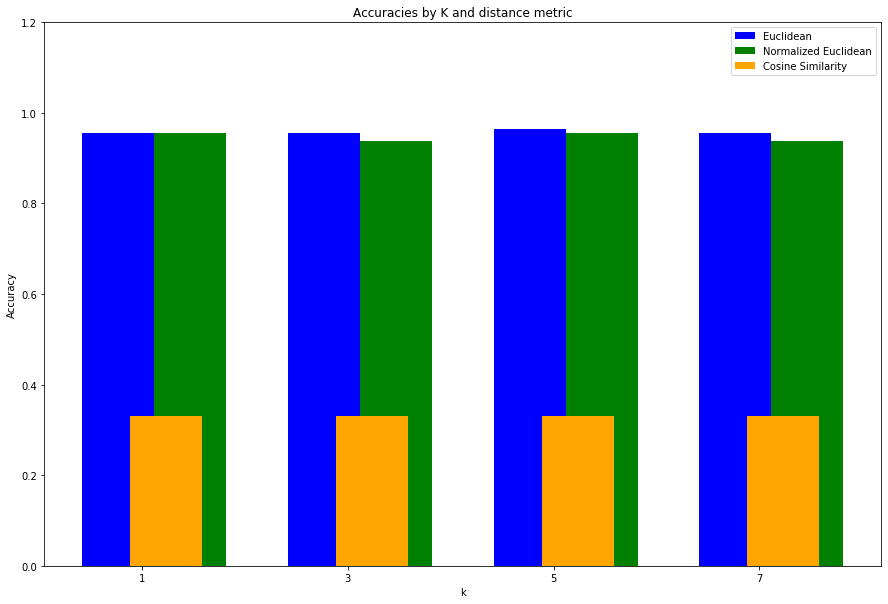

In [986]:
labels = [1,3,5,7]
eud_acc = [acc[i]['eud'] for i in list(acc)]
cos_acc = [acc[i]['cosine'] for i in list(acc)]
neud_acc = [acc[i]['neud'] for i in list(acc)]

width = 0.35
x = np.arange(len(labels)) 

fig, ax = plt.subplots(figsize=(15,10))
eu_bar = ax.bar(x - width/3, eud_acc, width, label='Euclidean', color='blue')
neu_bar = ax.bar(x + width*2/3, neud_acc, width, label='Normalized Euclidean', color='green')
cosine_bar = ax.bar(x + width/3, cos_acc, width, label='Cosine Similarity', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylim(0,1.2)
ax.set_title('Accuracies by K and distance metric')
ax.set_xlabel("k")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.show()

## Determine optimal hyper-parameters

As it can be noticed from the above chart, cosine similarity is **not** a good distance measure for this dataset regardless of the number of neighbors. **Euclidean** and **Normalized Euclidean** distance performed better on this dataset for `k = [3,5]`. Therefore we pick 3 and ***Euclidean distance*** as best Hyper-parameters for this dataset.

# Predict class of test data

Here we use the optimal hyper-parameters we obtained from the above steps to predict the test data using the following steps

## 1. Calculate Euclidean distance
Calculate euclidean distance between every point in the test dataset with every point in the dev set and pick 3 nearest neighbors

In [987]:
test['seq'] = test.index
test2 = test.values
test_eud = []
l = len(test)
for i in range(l):
    test_eu_distance = []
    for j in range(len(dev)):
        index = dev2[j][5]
        ed = get_euclidean(test2[i][:-2], dev2[j][:-2])
        test_eu_distance.append((ed, index))
        
    test_eu_distance.sort(key= lambda x: x[0])
    test_eu_distance = [i[1] for i in test_eu_distance]
    test_eud.append(test_eu_distance)
    
test['euclidean'] = test_eud

## 2. Pick Nearest Neighbors

Since we obtained 3 as optimal value for the hyperparameter `k`, we find **3** nearest neighbors between every point in the test set and every point in the dev set using ***Euclidean Distance***

In [988]:
test['eu'] = test.apply(lambda x: get_nearest(x, 'euclidean',3), axis=1)
test[file_columns+['eu']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu
37,4.4,2.9,1.4,0.2,Iris-setosa,"[37, 107, 38]"
38,4.6,3.1,1.5,0.2,Iris-setosa,"[38, 34, 51]"
39,4.9,3.0,1.4,0.2,Iris-setosa,"[39, 87, 102]"
40,4.5,2.3,1.3,0.3,Iris-setosa,"[40, 37, 107]"
41,5.4,3.9,1.3,0.4,Iris-setosa,"[41, 90, 27]"


## 3. Classify the test set

Pick the most dominant class among ***3*** nearest neighbors

In [989]:
test['eu_class'] = test['eu'].apply(lambda row: get_dominant_class(dev, row))
test[file_columns+['eu_class']].head()

,sepal_len,sepal_width,petal_len,petal_width,class,eu_class
37,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa
38,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
39,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
40,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
41,5.4,3.9,1.3,0.4,Iris-setosa,Iris-setosa


## 4. Accuracy over test set

Calculate accuracy of the predicted class over the test dataset

In [990]:
test_acc = test[test['class']==test['eu_class']].shape[0]/test.shape[0]
print('Test Accuracy: {:2.4f}%'.format(test_acc*100))

Test Accuracy: 99.1150%
